<a href="https://colab.research.google.com/github/acaicomdados/analise-reservatorios-federais/blob/main/Extra/Minicurso%20Jes%20/An%C3%A1lise_de_estac%C3%B5es_meterologicas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise das estações meteorologicas

Neste notebook iremos fazer uma analise das estações metereologicas que existem no Brasil da INMET e verificar se da pra utilizar comparando as hidreletricas sobre impacto ambiental

Então esta análise tem por dois objetivos:

- Conhecer as estações meterologicas
- Verificar se vai possivel a partir desses dados verificar para o que se quer saber em relação as hidreletricas

In [1]:
!pip install basedosdados

In [2]:
# importar as blibiotecas

import basedosdados as bd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
estacoes = bd.read_table(dataset_id='br_inmet_bdmep',table_id='estacao',billing_project_id="712632129479")
estacoes.head()

Downloading: 100%|██████████| 612/612 [00:00<00:00, 2236.89rows/s]


,id_municipio,id_estacao,estacao,data_fundacao,latitude,longitude,altitude
0,5300108,A001,Brasilia,2000-05-07,-15.789444,-47.925833,1160.96
1,5300108,A042,Brazlandia,2017-07-19,-15.599722,-48.131111,1143.00
2,5300108,A045,Aguas Emendadas,2008-10-03,-15.596491,-47.625801,1030.36
3,5300108,A046,Gama (Ponte Alta),2014-10-01,-15.935278,-48.137500,990.00
4,5300108,A047,Paranoa (Coopa-Df),2017-02-07,-16.012222,-47.557417,1043.00


In [5]:
url = 'https://raw.githubusercontent.com/acaicomdados/analise-reservatorios-federais/main/Extra/Minicurso%20Jes%20/estado_e_municipio.csv'

ibge_codigo = pd.read_csv(url)
ibge_codigo.drop(['Unnamed: 0','COD UF'],axis=1,inplace=True)
ibge_codigo.head()

,Sigla_estado,COD,Nome do municipio
0,SP,3500105,Adamantina
1,SP,3500204,Adolfo
2,SP,3500303,Aguaí
3,SP,3500402,Águas da Prata
4,SP,3500501,Águas de Lindóia


In [8]:
ibge_codigo.rename(columns={'COD':'id_municipio'},inplace=True)
ibge_codigo.head()

,Sigla_estado,id_municipio,Nome do municipio
0,SP,3500105,Adamantina
1,SP,3500204,Adolfo
2,SP,3500303,Aguaí
3,SP,3500402,Águas da Prata
4,SP,3500501,Águas de Lindóia


In [9]:
estacoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 612 entries, 0 to 611
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id_municipio   610 non-null    object 
 1   id_estacao     612 non-null    object 
 2   estacao        612 non-null    object 
 3   data_fundacao  612 non-null    dbdate 
 4   latitude       612 non-null    float64
 5   longitude      612 non-null    float64
 6   altitude       595 non-null    float64
dtypes: dbdate(1), float64(3), object(3)
memory usage: 33.6+ KB


In [11]:
ibge_codigo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sigla_estado       5570 non-null   object
 1   id_municipio       5570 non-null   int64 
 2   Nome do municipio  5570 non-null   object
dtypes: int64(1), object(2)
memory usage: 130.7+ KB


In [12]:
ibge_codigo['id_municipio'] = ibge_codigo['id_municipio'].astype(str)
ibge_codigo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sigla_estado       5570 non-null   object
 1   id_municipio       5570 non-null   object
 2   Nome do municipio  5570 non-null   object
dtypes: object(3)
memory usage: 130.7+ KB


In [14]:
estacoes = estacoes.merge(ibge_codigo,on='id_municipio')
estacoes.head()

,id_municipio,id_estacao,estacao,data_fundacao,latitude,longitude,altitude,Sigla_estado,Nome do municipio
0,5300108,A001,Brasilia,2000-05-07,-15.789444,-47.925833,1160.96,DF,Brasília
1,5300108,A042,Brazlandia,2017-07-19,-15.599722,-48.131111,1143.00,DF,Brasília
2,5300108,A045,Aguas Emendadas,2008-10-03,-15.596491,-47.625801,1030.36,DF,Brasília
3,5300108,A046,Gama (Ponte Alta),2014-10-01,-15.935278,-48.137500,990.00,DF,Brasília
4,5300108,A047,Paranoa (Coopa-Df),2017-02-07,-16.012222,-47.557417,1043.00,DF,Brasília


In [16]:
estacoes.drop('id_municipio',axis=1,inplace=True)
estacoes.head()

,id_estacao,estacao,data_fundacao,latitude,longitude,altitude,Sigla_estado,Nome do municipio
0,A001,Brasilia,2000-05-07,-15.789444,-47.925833,1160.96,DF,Brasília
1,A042,Brazlandia,2017-07-19,-15.599722,-48.131111,1143.00,DF,Brasília
2,A045,Aguas Emendadas,2008-10-03,-15.596491,-47.625801,1030.36,DF,Brasília
3,A046,Gama (Ponte Alta),2014-10-01,-15.935278,-48.137500,990.00,DF,Brasília
4,A047,Paranoa (Coopa-Df),2017-02-07,-16.012222,-47.557417,1043.00,DF,Brasília


In [17]:
estacoes['data_fundacao'] = pd.to_datetime(estacoes['data_fundacao'],format='%Y-%m-%d')
estacoes.head()

,id_estacao,estacao,data_fundacao,latitude,longitude,altitude,Sigla_estado,Nome do municipio
0,A001,Brasilia,2000-05-07,-15.789444,-47.925833,1160.96,DF,Brasília
1,A042,Brazlandia,2017-07-19,-15.599722,-48.131111,1143.00,DF,Brasília
2,A045,Aguas Emendadas,2008-10-03,-15.596491,-47.625801,1030.36,DF,Brasília
3,A046,Gama (Ponte Alta),2014-10-01,-15.935278,-48.137500,990.00,DF,Brasília
4,A047,Paranoa (Coopa-Df),2017-02-07,-16.012222,-47.557417,1043.00,DF,Brasília


In [22]:
estacoes['ano_fundacao'] = estacoes['data_fundacao'].dt.year
estacoes.head()

,id_estacao,estacao,data_fundacao,latitude,longitude,altitude,Sigla_estado,Nome do municipio,ano_fundacao
0,A001,Brasilia,2000-05-07,-15.789444,-47.925833,1160.96,DF,Brasília,2000
1,A042,Brazlandia,2017-07-19,-15.599722,-48.131111,1143.00,DF,Brasília,2017
2,A045,Aguas Emendadas,2008-10-03,-15.596491,-47.625801,1030.36,DF,Brasília,2008
3,A046,Gama (Ponte Alta),2014-10-01,-15.935278,-48.137500,990.00,DF,Brasília,2014
4,A047,Paranoa (Coopa-Df),2017-02-07,-16.012222,-47.557417,1043.00,DF,Brasília,2017


Text(0, 0.5, 'Quantidade de estações')

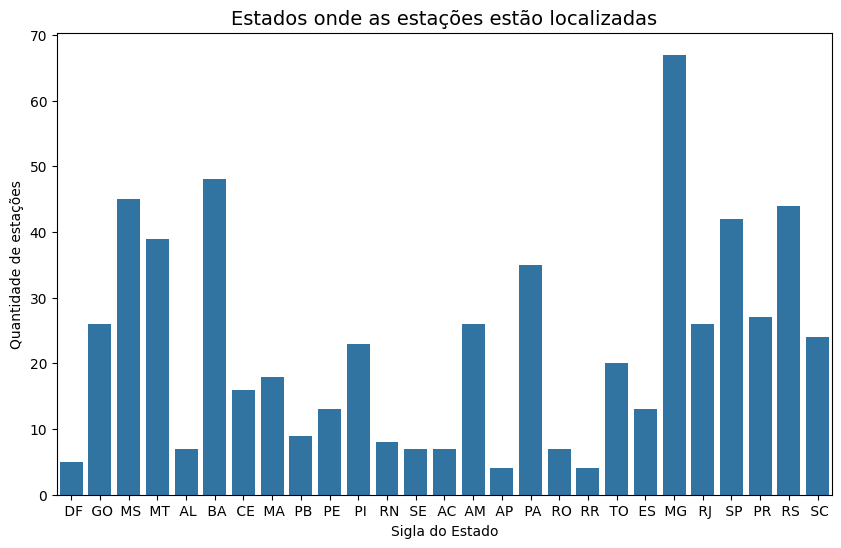

In [21]:
plt.figure(figsize=(10,6))
plt.title('Estados onde as estações estão localizadas',fontsize=14)
sns.countplot(x='Sigla_estado',data=estacoes)
plt.xlabel('Sigla do Estado')
plt.ylabel('Quantidade de estações')

Text(0, 0.5, 'Quantidade de estações')

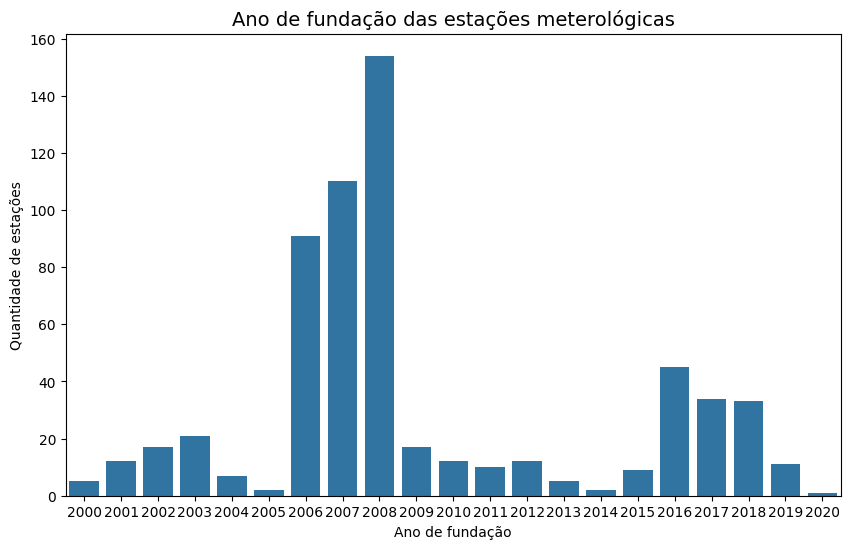

In [27]:
plt.figure(figsize=(10,6))
plt.title('Ano de fundação das estações meterológicas',fontsize=14)
sns.countplot(x='ano_fundacao',data=estacoes)
plt.xlabel('Ano de fundação')
plt.ylabel('Quantidade de estações')

In [26]:
estacoes.describe()

,latitude,longitude,altitude,ano_fundacao
count,610.000000,610.000000,593.000000,610.000000
mean,-15.625256,-48.381199,416.733693,2009.132787
std,8.290377,7.236702,343.892290,4.666240
min,-33.742297,-72.786667,1.000000,2000.000000
25%,-22.224889,-52.921503,131.410000,2006.000000
50%,-16.124167,-48.228333,365.790000,2008.000000
75%,-8.682431,-42.803194,624.000000,2011.000000
max,4.477500,-34.815556,2450.000000,2020.000000


Text(0, 0.5, 'Quantidade de estações')

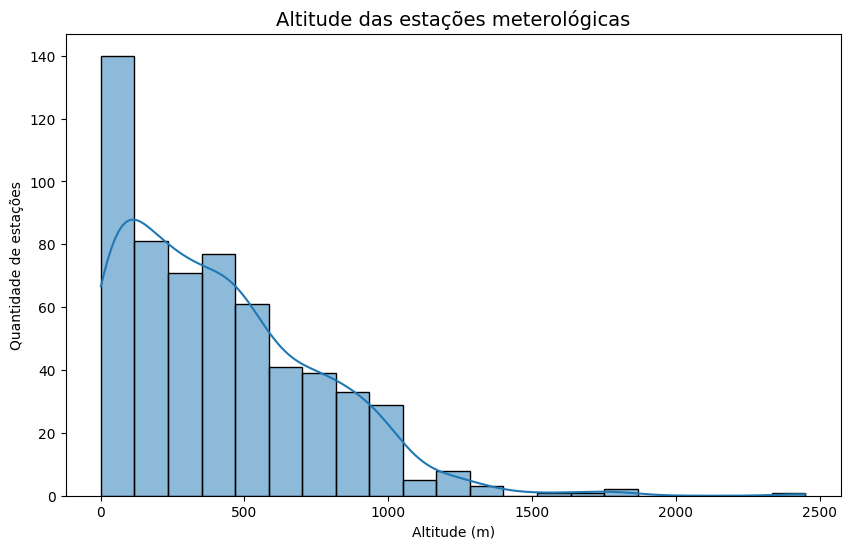

In [30]:
plt.figure(figsize=(10,6))
plt.title('Altitude das estações meterológicas',fontsize=14)
sns.histplot(x='altitude',data=estacoes,kde=True)
plt.xlabel('Altitude (m)')
plt.ylabel('Quantidade de estações')

Text(0, 0.5, 'Ano de fundação')

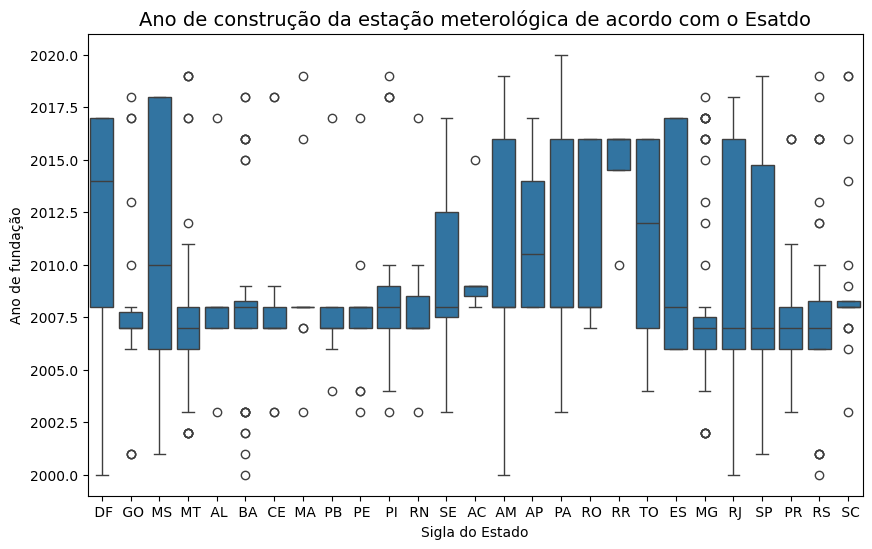

In [38]:
plt.figure(figsize=(10,6))
plt.title('Ano de construção da estação meterológica de acordo com o Esatdo',
          fontsize=14)
sns.boxplot(x='Sigla_estado',y='ano_fundacao',data=estacoes)
plt.xlabel('Sigla do Estado')
plt.ylabel('Ano de fundação')

Text(0, 0.5, 'Ano de fundação')

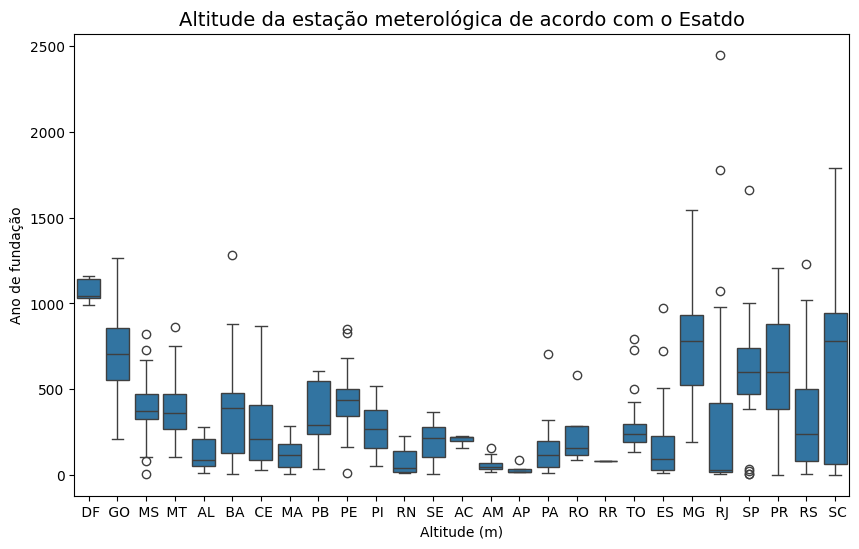

In [39]:
plt.figure(figsize=(10,6))
plt.title('Altitude da estação meterológica de acordo com o Esatdo',
          fontsize=14)
sns.boxplot(x='Sigla_estado',y='altitude',data=estacoes)
plt.xlabel('Altitude (m)')
plt.ylabel('Ano de fundação')

In [40]:
estacoes.columns

Index(['id_estacao', 'estacao', 'data_fundacao', 'latitude', 'longitude',
       'altitude', 'Sigla_estado', 'Nome do municipio', 'ano_fundacao'],
      dtype='object')

In [43]:
estacoes_inmet = px.scatter_mapbox(estacoes,lat='latitude',lon='longitude',hover_name='estacao',
                                   hover_data=['id_estacao','data_fundacao','Sigla_estado','Nome do municipio',
                                               'altitude'],title='Estações meterologicas da INMET',
                                   color='ano_fundacao')
estacoes_inmet.update_layout(mapbox_style="open-street-map")
estacoes_inmet.show()

As conclusões que temos durante essa análise das estações meterologicas foram que:

- A maioria delas se concentram no Estado de Minas Gerais
- A maioria foi contruida durante os anos de 2006, 2007 e 2008
- Poderia conversar com um especialista sobre se altitude importa na análise em que sentido e as informações que forem obtidas tem alguma importância
- Em alguns Estados teve um periodo maior que teve construção, se compardo com outros
- Há necessidade construção de estações principalmente na região norte para previsão meterologica e etc


In [44]:
reservatorio = bd.read_table(dataset_id='br_ons_avaliacao_operacao',table_id='reservatorio',billing_project_id="712632129479")
reservatorio.head()

Downloading: 100%|██████████| 159/159 [00:00<00:00, 818.92rows/s]


,data,id_subsistema,subsistema,id_empreendimento_aneel,id_reservatorio_planejamento,id_posto_vazao,reservatorio_equivalente,reservatorio,tipo_reservatorio,usina,...,cota_minima,volume_maximo,volume_minimo,volume_util,produtividade_especifica,produtividade_65_volume_util,tipo_perda,perda_carga,latitude,longitude
0,1956-04-01,S,SUL,UHE.PH.RS.000635-1.01,,,SUL,CANASTRA,FIO DAGUA,CANASTRA,...,540.33,0.425,0.183,0.242,0.000000,0.0000,nan,NaN,NaN,NaN
1,2007-02-03,S,SUL,UHE.PH.SC.027401-1.01,9,216,SUL,CAMPOS NOVOS,RESERVATORIO COM USINA,CAMPOS NOVOS,...,655.00,1477.000,1320.000,129.620,0.009083,1.6063,m,2.48,-27.603056,-51.323611
2,2005-11-01,S,SUL,UHE.PH.RS.027556-5.01,86,215,SUL,BARRA GRANDE,RESERVATORIO COM USINA,BARRA GRANDE,...,617.00,4904.450,2711.790,2192.660,0.009218,1.4153,m,2.79,-27.777222,-51.188611
3,2022-07-21,S,SUL,UHE.PH.SC.030938-9.01,88,88,SUL,SAO ROQUE,RESERVATORIO COM USINA,SAO ROQUE,...,746.00,795.670,336.720,458.950,0.008878,0.4335,m,0.60,-27.497778,-50.804639
4,2013-09-24,S,SUL,UHE.PH.SC.030415-8.01,89,89,SUL,GARIBALDI,RESERVATORIO COM USINA,GARIBALDI,...,702.50,296.000,232.000,64.230,0.008626,0.3691,m,1.19,-27.624722,-50.983889


In [45]:
reservatorio = reservatorio[['data','subsistema','reservatorio','tipo_reservatorio','latitude','longitude']]
reservatorio.head()

,data,subsistema,reservatorio,tipo_reservatorio,latitude,longitude
0,1956-04-01,SUL,CANASTRA,FIO DAGUA,NaN,NaN
1,2007-02-03,SUL,CAMPOS NOVOS,RESERVATORIO COM USINA,-27.603056,-51.323611
2,2005-11-01,SUL,BARRA GRANDE,RESERVATORIO COM USINA,-27.777222,-51.188611
3,2022-07-21,SUL,SAO ROQUE,RESERVATORIO COM USINA,-27.497778,-50.804639
4,2013-09-24,SUL,GARIBALDI,RESERVATORIO COM USINA,-27.624722,-50.983889


In [48]:
reservatorio['data'] = pd.to_datetime(reservatorio['data'],format='%Y-%m-%d')
reservatorio.head()

,data,subsistema,reservatorio,tipo_reservatorio,latitude,longitude
0,1956-04-01,SUL,CANASTRA,FIO DAGUA,NaN,NaN
1,2007-02-03,SUL,CAMPOS NOVOS,RESERVATORIO COM USINA,-27.603056,-51.323611
2,2005-11-01,SUL,BARRA GRANDE,RESERVATORIO COM USINA,-27.777222,-51.188611
3,2022-07-21,SUL,SAO ROQUE,RESERVATORIO COM USINA,-27.497778,-50.804639
4,2013-09-24,SUL,GARIBALDI,RESERVATORIO COM USINA,-27.624722,-50.983889


In [49]:
reservatorio['ano'] = reservatorio['data'].dt.year
reservatorio.head()

,data,subsistema,reservatorio,tipo_reservatorio,latitude,longitude,ano
0,1956-04-01,SUL,CANASTRA,FIO DAGUA,NaN,NaN,1956
1,2007-02-03,SUL,CAMPOS NOVOS,RESERVATORIO COM USINA,-27.603056,-51.323611,2007
2,2005-11-01,SUL,BARRA GRANDE,RESERVATORIO COM USINA,-27.777222,-51.188611,2005
3,2022-07-21,SUL,SAO ROQUE,RESERVATORIO COM USINA,-27.497778,-50.804639,2022
4,2013-09-24,SUL,GARIBALDI,RESERVATORIO COM USINA,-27.624722,-50.983889,2013


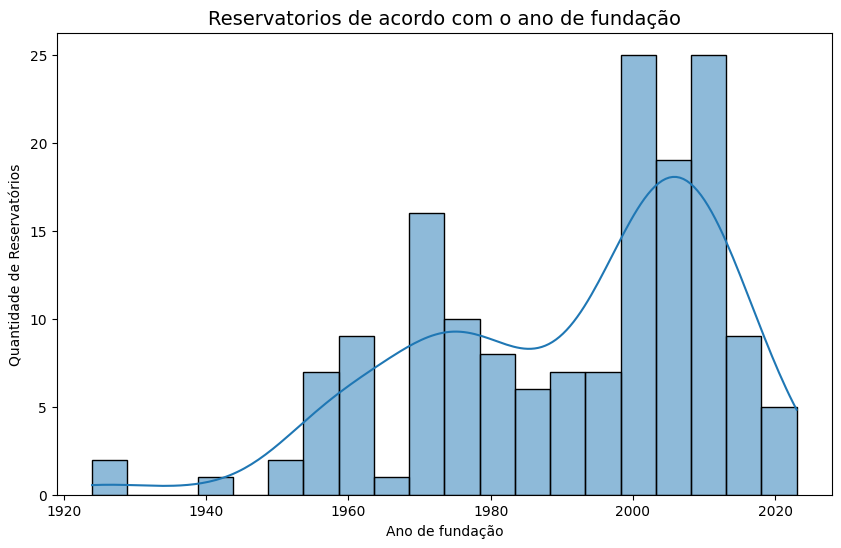

In [59]:
plt.figure(figsize=(10,6))
plt.title('Reservatorios de acordo com o ano de fundação',fontsize=14)
sns.histplot(x='ano',data=reservatorio,bins=20,kde=True)
plt.xlabel('Ano de fundação')
plt.ylabel('Quantidade de Reservatórios');

Text(0, 0.5, 'Quantidade de Reservatórios')

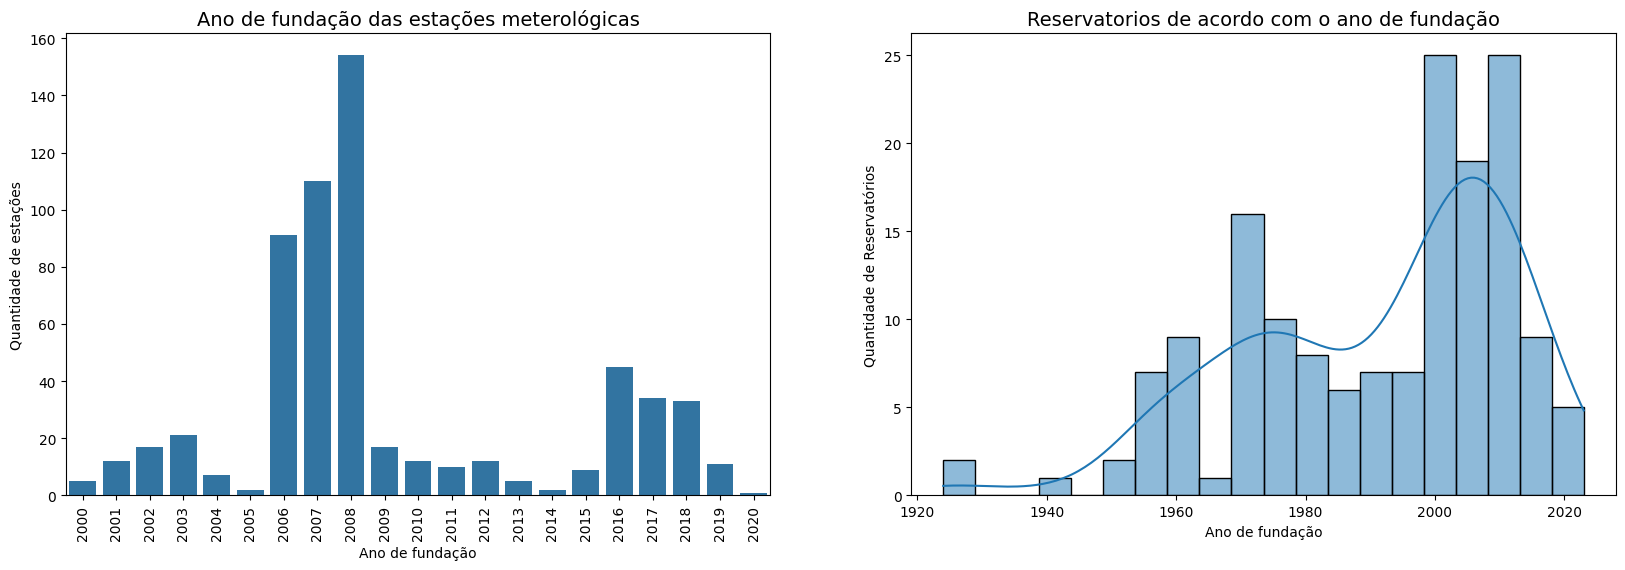

In [62]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)

plt.title('Ano de fundação das estações meterológicas',fontsize=14)
sns.countplot(x='ano_fundacao',data=estacoes)
plt.xlabel('Ano de fundação')
plt.ylabel('Quantidade de estações')
plt.xticks(rotation=90)

plt.subplot(1,2,2)

plt.title('Reservatorios de acordo com o ano de fundação',fontsize=14)
sns.histplot(x='ano',data=reservatorio,bins=20,kde=True)
plt.xlabel('Ano de fundação')
plt.ylabel('Quantidade de Reservatórios')

In [63]:
estacoes.head()

,id_estacao,estacao,data_fundacao,latitude,longitude,altitude,Sigla_estado,Nome do municipio,ano_fundacao
0,A001,Brasilia,2000-05-07,-15.789444,-47.925833,1160.96,DF,Brasília,2000
1,A042,Brazlandia,2017-07-19,-15.599722,-48.131111,1143.00,DF,Brasília,2017
2,A045,Aguas Emendadas,2008-10-03,-15.596491,-47.625801,1030.36,DF,Brasília,2008
3,A046,Gama (Ponte Alta),2014-10-01,-15.935278,-48.137500,990.00,DF,Brasília,2014
4,A047,Paranoa (Coopa-Df),2017-02-07,-16.012222,-47.557417,1043.00,DF,Brasília,2017


In [65]:
estacoes_filtrado = estacoes[['estacao','data_fundacao','latitude','longitude']]
estacoes_filtrado.head()

,estacao,data_fundacao,latitude,longitude
0,Brasilia,2000-05-07,-15.789444,-47.925833
1,Brazlandia,2017-07-19,-15.599722,-48.131111
2,Aguas Emendadas,2008-10-03,-15.596491,-47.625801
3,Gama (Ponte Alta),2014-10-01,-15.935278,-48.137500
4,Paranoa (Coopa-Df),2017-02-07,-16.012222,-47.557417


In [69]:
lista_estacao = []

for i in range(estacoes_filtrado.shape[0]):
  lista_estacao.append('Estação Meterologica')

lista_estacao


['Estação Meterologica',
 'Estação Meterologica',
 'Estação Meterologica',
 'Estação Meterologica',
 'Estação Meterologica',
 'Estação Meterologica',
 'Estação Meterologica',
 'Estação Meterologica',
 'Estação Meterologica',
 'Estação Meterologica',
 'Estação Meterologica',
 'Estação Meterologica',
 'Estação Meterologica',
 'Estação Meterologica',
 'Estação Meterologica',
 'Estação Meterologica',
 'Estação Meterologica',
 'Estação Meterologica',
 'Estação Meterologica',
 'Estação Meterologica',
 'Estação Meterologica',
 'Estação Meterologica',
 'Estação Meterologica',
 'Estação Meterologica',
 'Estação Meterologica',
 'Estação Meterologica',
 'Estação Meterologica',
 'Estação Meterologica',
 'Estação Meterologica',
 'Estação Meterologica',
 'Estação Meterologica',
 'Estação Meterologica',
 'Estação Meterologica',
 'Estação Meterologica',
 'Estação Meterologica',
 'Estação Meterologica',
 'Estação Meterologica',
 'Estação Meterologica',
 'Estação Meterologica',
 'Estação Meterologica',


In [70]:
estacoes_filtrado['tipo'] = lista_estacao
estacoes_filtrado.head()

,estacao,data_fundacao,latitude,longitude,tipo
0,Brasilia,2000-05-07,-15.789444,-47.925833,Estação Meterologica
1,Brazlandia,2017-07-19,-15.599722,-48.131111,Estação Meterologica
2,Aguas Emendadas,2008-10-03,-15.596491,-47.625801,Estação Meterologica
3,Gama (Ponte Alta),2014-10-01,-15.935278,-48.137500,Estação Meterologica
4,Paranoa (Coopa-Df),2017-02-07,-16.012222,-47.557417,Estação Meterologica


In [67]:
reservatorio_filtrado = reservatorio[['reservatorio','data','latitude','longitude']]
reservatorio_filtrado.head()

,reservatorio,data,latitude,longitude
0,CANASTRA,1956-04-01,NaN,NaN
1,CAMPOS NOVOS,2007-02-03,-27.603056,-51.323611
2,BARRA GRANDE,2005-11-01,-27.777222,-51.188611
3,SAO ROQUE,2022-07-21,-27.497778,-50.804639
4,GARIBALDI,2013-09-24,-27.624722,-50.983889


In [71]:
lista_reservatorio = []

for i in range(reservatorio_filtrado.shape[0]):
  lista_reservatorio.append('Reservatorio')

In [73]:
reservatorio_filtrado['tipo'] = lista_reservatorio
reservatorio_filtrado.head()

,reservatorio,data,latitude,longitude,tipo
0,CANASTRA,1956-04-01,NaN,NaN,Reservatorio
1,CAMPOS NOVOS,2007-02-03,-27.603056,-51.323611,Reservatorio
2,BARRA GRANDE,2005-11-01,-27.777222,-51.188611,Reservatorio
3,SAO ROQUE,2022-07-21,-27.497778,-50.804639,Reservatorio
4,GARIBALDI,2013-09-24,-27.624722,-50.983889,Reservatorio


In [74]:
reservatorio_filtrado.rename(columns={'reservatorio':'nome','data':'data_fundacao'},inplace=True)
reservatorio_filtrado.head()

,nome,data_fundacao,latitude,longitude,tipo
0,CANASTRA,1956-04-01,NaN,NaN,Reservatorio
1,CAMPOS NOVOS,2007-02-03,-27.603056,-51.323611,Reservatorio
2,BARRA GRANDE,2005-11-01,-27.777222,-51.188611,Reservatorio
3,SAO ROQUE,2022-07-21,-27.497778,-50.804639,Reservatorio
4,GARIBALDI,2013-09-24,-27.624722,-50.983889,Reservatorio


In [76]:
estacoes_filtrado.rename(columns={'bome':'nome'},inplace=True)
estacoes_filtrado.head()

,nome,data_fundacao,latitude,longitude,tipo
0,Brasilia,2000-05-07,-15.789444,-47.925833,Estação Meterologica
1,Brazlandia,2017-07-19,-15.599722,-48.131111,Estação Meterologica
2,Aguas Emendadas,2008-10-03,-15.596491,-47.625801,Estação Meterologica
3,Gama (Ponte Alta),2014-10-01,-15.935278,-48.137500,Estação Meterologica
4,Paranoa (Coopa-Df),2017-02-07,-16.012222,-47.557417,Estação Meterologica


In [78]:
estacao_e_reservatorio = pd.concat([estacoes_filtrado,reservatorio_filtrado],axis=0)
estacao_e_reservatorio

,nome,data_fundacao,latitude,longitude,tipo
0,Brasilia,2000-05-07,-15.789444,-47.925833,Estação Meterologica
1,Brazlandia,2017-07-19,-15.599722,-48.131111,Estação Meterologica
2,Aguas Emendadas,2008-10-03,-15.596491,-47.625801,Estação Meterologica
3,Gama (Ponte Alta),2014-10-01,-15.935278,-48.137500,Estação Meterologica
4,Paranoa (Coopa-Df),2017-02-07,-16.012222,-47.557417,Estação Meterologica
...,...,...,...,...,...
154,CANOAS I,1999-05-09,-22.942222,-50.516389,Reservatorio
155,CAPIVARA,1977-03-10,-22.661111,-51.353889,Reservatorio
156,TAQUARUCU,1992-12-11,-22.544722,-51.995833,Reservatorio
157,ROSANA,1987-06-11,-22.602222,-52.868611,Reservatorio


In [80]:
estacoes_e_reser = px.scatter_mapbox(estacao_e_reservatorio,lat='latitude',lon='longitude',hover_name='nome',
                                     title='Estações meterologicas da INMET e reservatorios',
                                   color='tipo')
estacoes_e_reser.update_layout(mapbox_style="open-street-map")
estacoes_e_reser.show()

Através dessa análise, temos que:

- Pelo ano de fundação, parece que a maioria das estaçoes são mais novas que maioria dos reservatorio , sendo necessário utilizar outros estações como da ANA ou do INPE, por exemplo

- Pelo contexto de geolocalização do que foi observado, a maior dos reservatóris são próximas de alguma estação meterológica do INMET, algumas até com 3 do que foi percebido, então dependendo do reservatório a ser analisado os impactos ambientais, seria válido utilizar, mas maioria parece que não, necessitando outros tipos de estações de outros orgaão a serem observados essas possibilidades
